<a href="https://colab.research.google.com/github/AlapatiNithika/BharatIntern-Tasks/blob/main/BharatIntern_Task3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Task-3**

**Number Recognition**

Handwritten digit recognition system not only detects
scanned images of handwritten digits.Handwritten digit
recognition using MNIST dataset is a major project made
with the help of Neural Network. It basically detects
the scanned images of handwritten digits.

In [37]:
#Import necessary libraries
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Flatten, Dense
from tensorflow.keras.utils import to_categorical
from sklearn.metrics import confusion_matrix


In [38]:
#Load and preprocess the MNIST dataset
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()
train_images = train_images.astype('float32') / 255
test_images = test_images.astype('float32') / 255
train_labels = to_categorical(train_labels)
test_labels = to_categorical(test_labels)
predictions = model.predict(test_images)



313/313 [==============================] - 0s 1ms/step


In [39]:
# Calculate the confusion matrix
conf_matrix = confusion_matrix(np.argmax(test_labels, axis=1), np.argmax(predictions, axis=1))


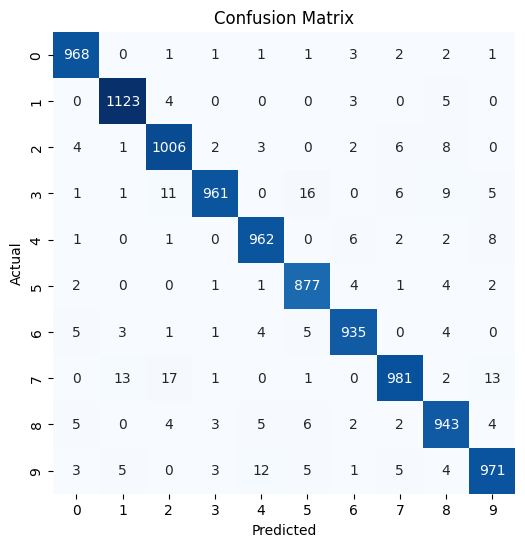

In [40]:
import seaborn as sns
# Plot the confusion matrix as a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', square=True, cbar=False,
            xticklabels=[str(i) for i in range(10)], yticklabels=[str(i) for i in range(10)])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()


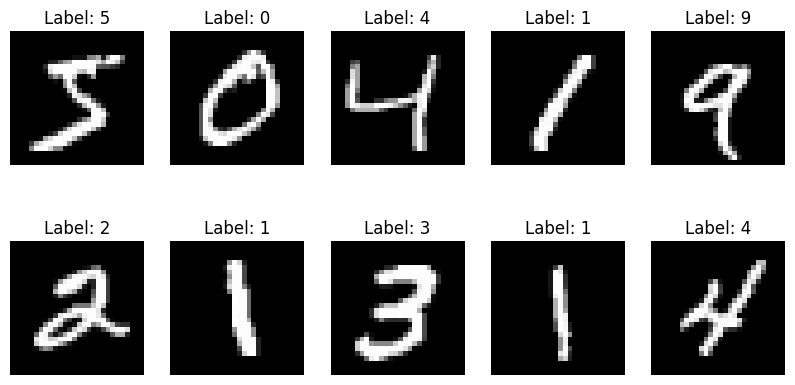

In [41]:
#Display sample images
plt.figure(figsize=(10, 5))
for i in range(10):
    plt.subplot(2, 5, i + 1)
    plt.imshow(train_images[i], cmap='gray')
    plt.title(f"Label: {np.argmax(train_labels[i])}")
    plt.axis('off')
plt.show()


In [42]:
#Build and compile the neural network
model = Sequential()
model.add(Flatten(input_shape=(28, 28)))
model.add(Dense(128, activation='relu'))
model.add(Dense(10, activation='softmax'))

model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])


In [43]:
#Train the model
history = model.fit(train_images, train_labels, epochs=5, batch_size=64, validation_split=0.2)


Epoch 1/5
750/750 [==============================] - 4s 4ms/step - loss: 0.3329 - accuracy: 0.9056 - val_loss: 0.1823 - val_accuracy: 0.9499
Epoch 2/5
750/750 [==============================] - 3s 4ms/step - loss: 0.1524 - accuracy: 0.9567 - val_loss: 0.1302 - val_accuracy: 0.9638
Epoch 3/5
750/750 [==============================] - 5s 6ms/step - loss: 0.1081 - accuracy: 0.9690 - val_loss: 0.1186 - val_accuracy: 0.9658
Epoch 4/5
750/750 [==============================] - 3s 4ms/step - loss: 0.0804 - accuracy: 0.9767 - val_loss: 0.0966 - val_accuracy: 0.9702
Epoch 5/5
750/750 [==============================] - 3s 4ms/step - loss: 0.0641 - accuracy: 0.9815 - val_loss: 0.0936 - val_accuracy: 0.9728


In [44]:
#Evaluate the model
test_loss, test_accuracy = model.evaluate(test_images, test_labels)
print(f'Test accuracy: {test_accuracy * 100:.2f}%')


313/313 [==============================] - 1s 2ms/step - loss: 0.0839 - accuracy: 0.9737
Test accuracy: 97.37%


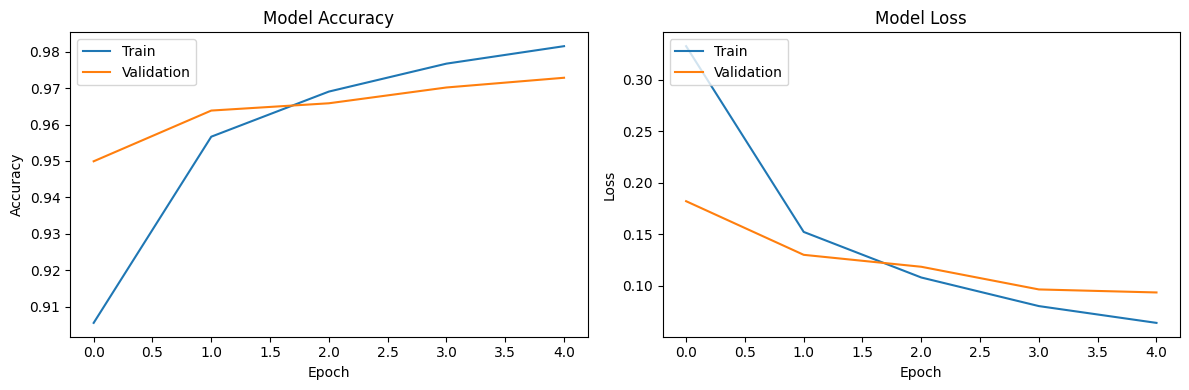

In [45]:
# Plot training & validation accuracy values
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(['Train', 'Validation'], loc='upper left')

# Plot training & validation loss values
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(['Train', 'Validation'], loc='upper left')

plt.tight_layout()
plt.show()


313/313 [==============================] - 0s 1ms/step


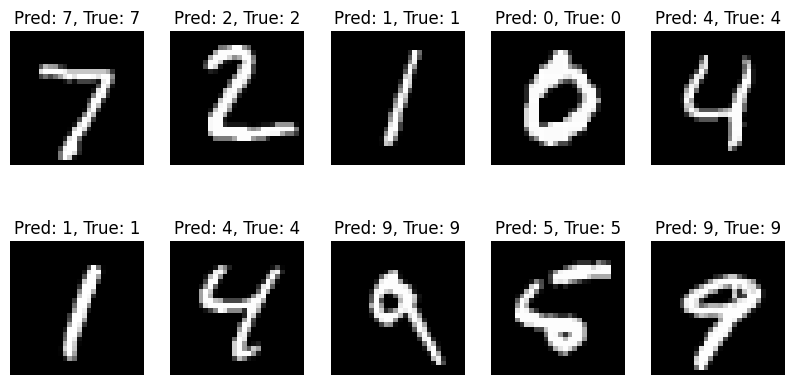

In [46]:
#Make and visualize predictions
predictions = model.predict(test_images)
plt.figure(figsize=(10, 5))
for i in range(10):
    plt.subplot(2, 5, i + 1)
    plt.imshow(test_images[i], cmap='gray')
    predicted_label = np.argmax(predictions[i])
    true_label = np.argmax(test_labels[i])
    plt.title(f"Pred: {predicted_label}, True: {true_label}")
    plt.axis('off')
plt.show()
